# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aswan
Processing Record 2 of Set 1 | colonia
Processing Record 3 of Set 1 | wodonga
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | sinan
Processing Record 7 of Set 1 | port hedland
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | laredo
Processing Record 10 of Set 1 | great falls
Processing Record 11 of Set 1 | vila velha
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | port saint john's
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | scottburgh
Processing Record 17 of Set 1 | pangai
Processing Record 18 of Set 1 | illizi
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aswan,24.0934,32.9070,40.02,10,4,5.22,EG,1718821743
1,colonia,50.9333,6.9500,20.87,62,20,2.06,DE,1718821743
2,wodonga,-36.1167,146.8833,0.71,95,3,2.02,AU,1718821743
3,stanley,54.8680,-1.6985,18.07,60,20,5.66,GB,1718821548
4,longyearbyen,78.2186,15.6401,8.91,40,75,9.26,SJ,1718821744


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aswan,24.0934,32.9070,40.02,10,4,5.22,EG,1718821743
1,colonia,50.9333,6.9500,20.87,62,20,2.06,DE,1718821743
2,wodonga,-36.1167,146.8833,0.71,95,3,2.02,AU,1718821743
3,stanley,54.8680,-1.6985,18.07,60,20,5.66,GB,1718821548
4,longyearbyen,78.2186,15.6401,8.91,40,75,9.26,SJ,1718821744


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

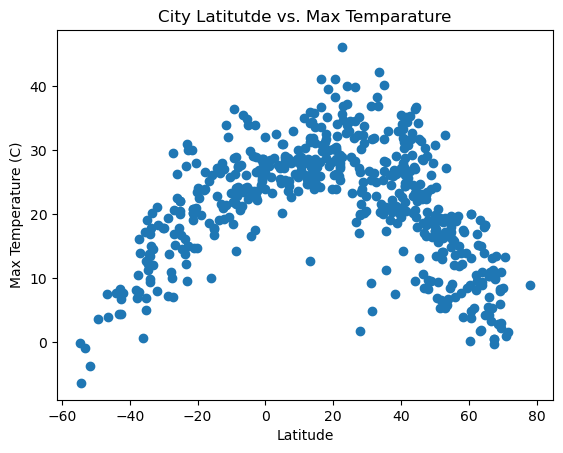

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitutde vs. Max Temparature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

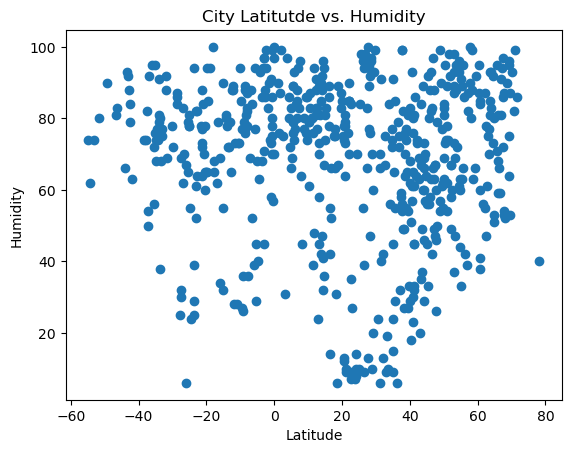

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitutde vs. Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

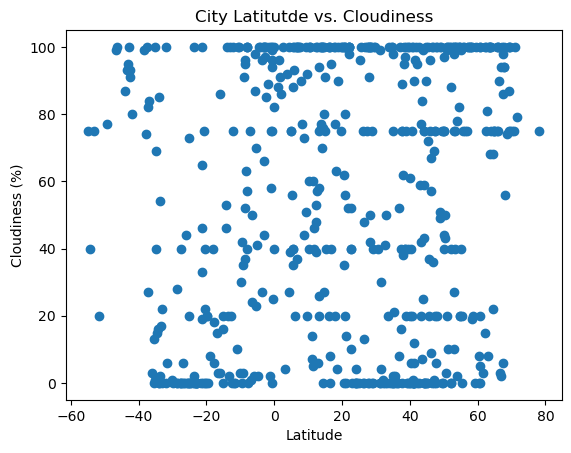

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitutde vs. Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

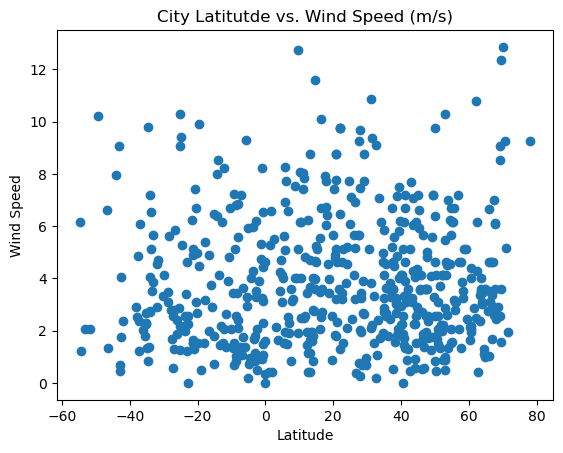

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitutde vs. Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    print(f'The Correlation Coefficient r = {rvalue}.')
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(0,2), xycoords='figure points', fontsize=15, color="red", annotation_clip=False)
    return
    

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aswan,24.0934,32.9070,40.02,10,4,5.22,EG,1718821743
1,colonia,50.9333,6.9500,20.87,62,20,2.06,DE,1718821743
3,stanley,54.8680,-1.6985,18.07,60,20,5.66,GB,1718821548
4,longyearbyen,78.2186,15.6401,8.91,40,75,9.26,SJ,1718821744
5,sinan,34.8262,126.1086,21.06,77,100,4.97,KR,1718821744


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,wodonga,-36.1167,146.8833,0.71,95,3,2.02,AU,1718821743
6,port hedland,-20.3167,118.5667,21.03,60,22,3.09,AU,1718821745
7,punta arenas,-53.1500,-70.9167,-0.94,74,75,2.06,CL,1718821674
10,vila velha,-20.3297,-40.2925,27.97,65,40,6.69,BR,1718821484
11,port elizabeth,-33.9180,25.5701,13.51,79,0,7.20,ZA,1718821746


###  Temperature vs. Latitude Linear Regression Plot

The Correlation Coefficient r = -0.6886839158031834.


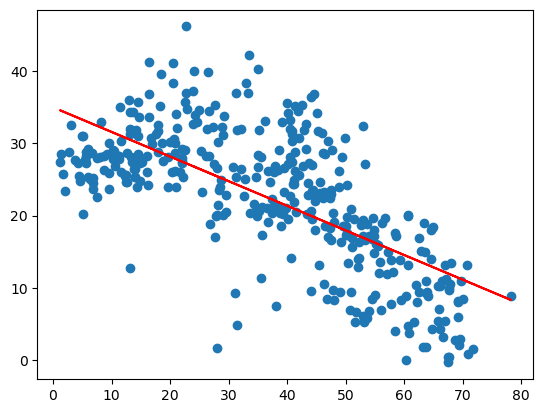

The Correlation Coefficient r = -0.6886839158031834.


Text(0, 0.5, 'Max Temperature (C)')

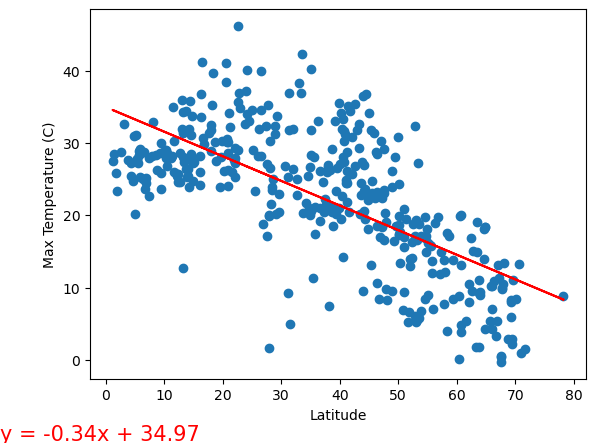

In [59]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


The Correlation Coefficient r = 0.8029258238773853.


Text(0, 0.5, 'Max Temperature (C)')

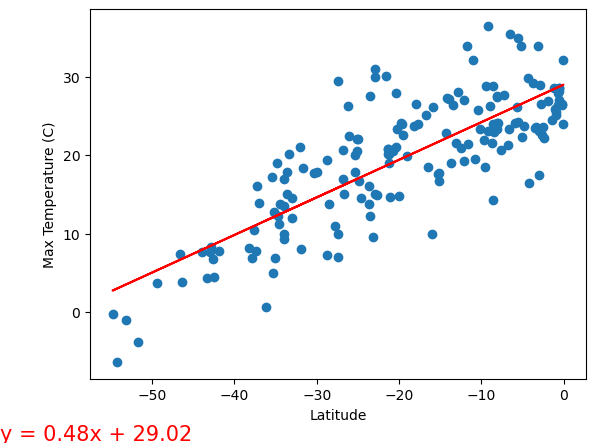

In [60]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

**Discussion about the linear relationship:** There appears to be a negative moderately strong linear relationship between latitude and max temperature in the northern hemisphere.  In the southern hemisphere, however, there is a positive strong linear relationship between the latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The Correlation Coefficient r = 0.04408254274149111.


Text(0, 0.5, 'Humidity')

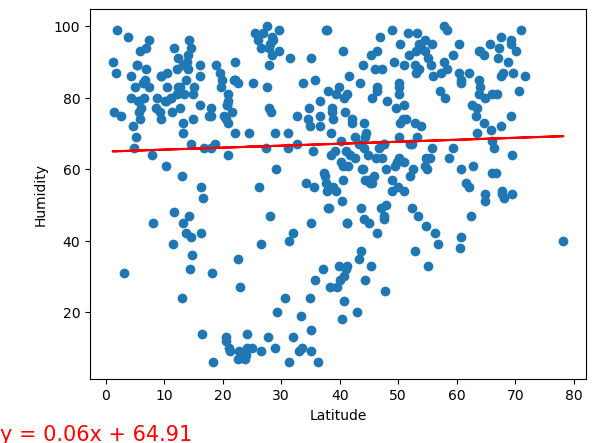

In [61]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The Correlation Coefficient r = 0.017352902858921316.


Text(0, 0.5, 'Humidity')

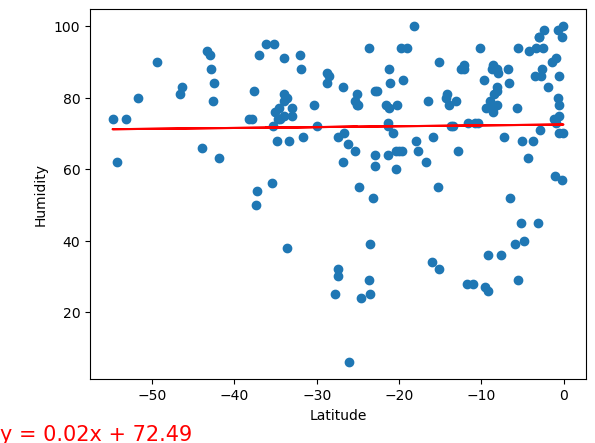

In [62]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** There is little to no linear relationship between latitude and humitidy for both the norhern and southern hemisphere since the correlation coefficient are both close to 0.

### Cloudiness vs. Latitude Linear Regression Plot

The Correlation Coefficient r = 0.01225016754696629.


Text(0, 0.5, 'Cloudiness (%)')

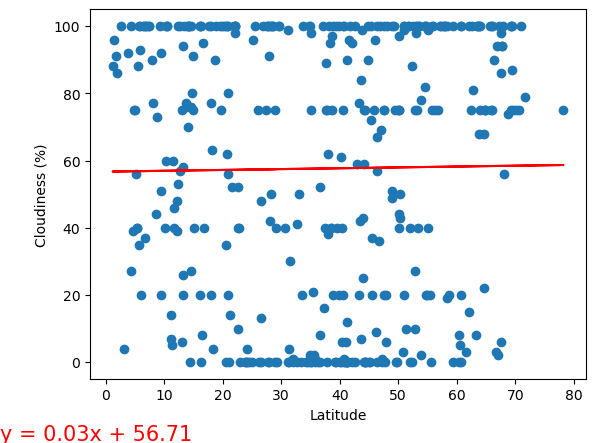

In [64]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

The Correlation Coefficient r = 0.1472033056592251.


Text(0, 0.5, 'Cloudiness (%)')

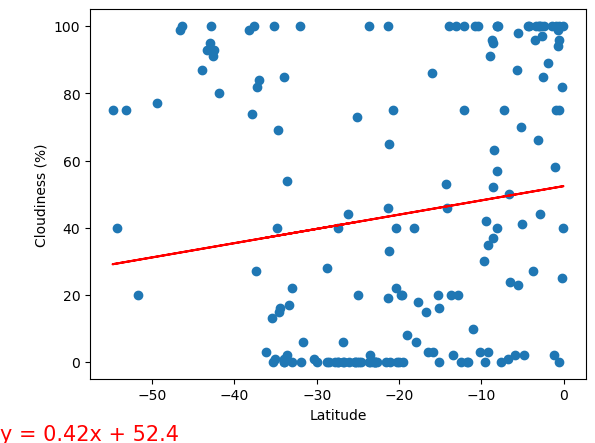

In [65]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

**Discussion about the linear relationship:** There is little to no linear relationship between latitude and cloudiness for both the northern and southern hemisphere since the correlation coefficient are both close to 0.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


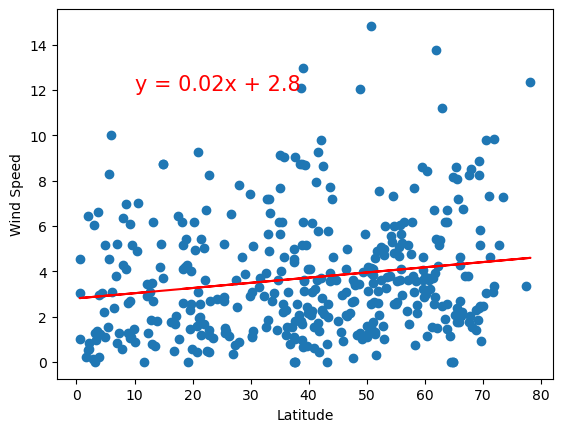

In [21]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

The Correlation Coefficient r = -0.08149341607481182.


Text(0, 0.5, 'Wind Speed (m/s)')

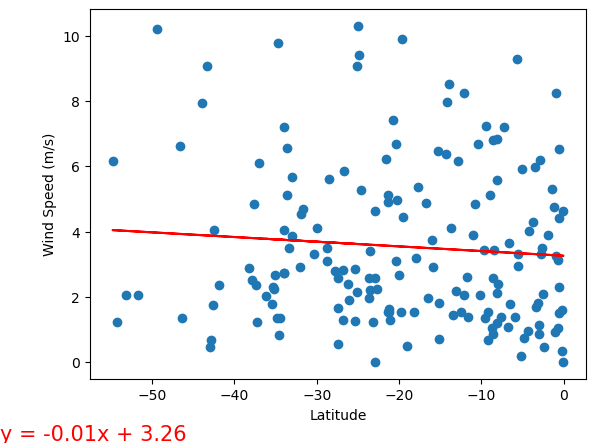

In [66]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

**Discussion about the linear relationship:** There is little to no linear relationship between latitude and Wind Speed for both the northern and southern hemisphere since the correlation coefficient are both close to 0.